### Imports and Setting Up the SAGA Data

In [1]:
#import os
#os.remove(saga.database["host_stats"].local.path)
#saga.database["host_stats"].clear_cache()
#%pip install --upgrade --no-deps --force-reinstall https://github.com/sagasurvey/saga/archive/master.zip

import pickle
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats 

import SAGA
print(SAGA.__version__)
saga = SAGA.QuickStart()
hosts = saga.host_catalog.load(include_stats=True)
assert saga.good.count(hosts) == 134
assert saga.paper3.count(hosts) == 97
assert saga.paper3.filter(hosts, "sats_total").sum() == 334
from SAGA.database import FitsTable 
from easyquery import Query
from easyquery import QueryMaker

from numpy import random
import numpy as np

saga = SAGA.QuickStart()

0.44.0
SAGA `shared_dir` set to /Users/Veronica/Downloads/SAGA_2021_research/More_LMC
SAGA `local_dir`  set to /Users/Veronica/Downloads/SAGA_2021_research/More_LMC
SAGA `shared_dir` set to /Users/Veronica/Downloads/SAGA_2021_research/More_LMC
SAGA `local_dir`  set to /Users/Veronica/Downloads/SAGA_2021_research/More_LMC


In [3]:
import random
from random import randint
from random import shuffle

In [45]:
with open(r'sat_alpha_015_new.pickle', 'rb') as f:
    p3_sat143 = pickle.load(f, encoding='latin1')
    
with open(r'host_halo_alpha_015_new.pickle', 'rb') as f:
    p3_host_halo143 = pickle.load(f, encoding='latin1')

with open(r'host_MK_alpha_015_new.pickle', 'rb') as f:
    p3_host_lum143 = pickle.load(f, encoding = 'latin1')     
    
with open(r'rproj_alpha_015_new.pickle', 'rb') as f:
    p3_rproj143 = pickle.load(f, encoding='latin1')
    
with open(r'vproj_alpha_015_new.pickle', 'rb') as f:
    p3_vproj143 = pickle.load(f, encoding='latin1')
    
with open(r'Mr_alpha_015_new.pickle', 'rb') as f:
    p3_Mr143 = pickle.load(f, encoding='latin1')


In [46]:
#Pre-computed catalogs for halos matched to SAGA hosts
with open(r"sat_alpha_139.pickle", "rb") as f:
    sat139 = pickle.load(f, encoding='latin1')
    
with open(r"host_halo_alpha_139.pickle", "rb") as f:
    host_halo139 = pickle.load(f, encoding='latin1')
    
with open(r"rproj_alpha_139.pickle", "rb") as f:
    rproj139 = pickle.load(f, encoding='latin1')
    
with open(r"vproj_alpha_139.pickle", "rb") as f:
    vproj139 = pickle.load(f, encoding='latin1')
    
with open(r"Mr_alpha_139.pickle", "rb") as f:
    Mr139 = pickle.load(f, encoding='latin1')

#Pre-computed catalogs for halos matched to SAGA hosts
with open(r"sat_alpha_146.pickle", "rb") as f:
    sat146 = pickle.load(f, encoding='latin1')
    
with open(r"host_halo_alpha_146.pickle", "rb") as f:
    host_halo146 = pickle.load(f, encoding='latin1')
    
with open(r"rproj_alpha_146.pickle", "rb") as f:
    rproj146 = pickle.load(f, encoding='latin1')
    
with open(r"vproj_alpha_146.pickle", "rb") as f:
    vproj146 = pickle.load(f, encoding='latin1')
    
with open(r"Mr_alpha_146.pickle", "rb") as f:
    Mr146 = pickle.load(f, encoding='latin1')

In [47]:
sigma_M_sats = 0.15

def draw_Mr_simple(Mr_mean,sigma_M):
    L_mean = 10**((-1.*Mr_mean + 4.81)/2.5 + np.log10(2))
    L= np.random.lognormal(np.log(L_mean),(np.log(10)*sigma_M))
    return -1.*(2.5*(np.log10(L)-np.log10(2))-4.81)

def actual_Mr_for_sats(satex, Mrex):
    x = {}
    for host in satex.keys():
        if len(satex[host])>0:
            x[host] = []
            for i in range(len(Mrex[host])):
                x[host].append(draw_Mr_simple(Mrex[host][i], sigma_M_sats))
    return x  


In [48]:
pred_Mr139 = actual_Mr_for_sats(sat139, Mr139)
#pred_Mr143 = actual_Mr_for_sats(sat143, Mr143)
pred_Mr146 = actual_Mr_for_sats(sat146, Mr146)

def predicting_LMCs(satex, Mrex):
    x = {}
    for key in satex.keys():
        x[key] = []
        for i in range(len(satex[key])):
            x[key].append(len(Mrex[key][i][Mrex[key][i]<-18.3]))
    return x
pred_LMC_139 = predicting_LMCs(sat139, pred_Mr139)
#pred_LMC_143 = predicting_LMCs(sat143, pred_Mr143)
pred_LMC_146 = predicting_LMCs(sat146, pred_Mr146)

In [49]:
p3_pred_Mr143 = actual_Mr_for_sats(p3_sat143, p3_Mr143)

In [6]:

hosts = saga.host_catalog.load(include_stats="remote")
p3_complete_hosts = saga.host_catalog.load(query="paper3", include_stats="remote")
p2_complete_hosts = saga.host_catalog.load(query="paper2_complete", include_stats="remote")
observed_hosts = saga.host_catalog.load(query="observed", include_stats="remote")

from SAGA import ObjectCuts as C
saga.database["combined_base"].remote.path = "https://rutgers.box.com/shared/static/0ql9oqqhzu2wt3gwiwn84etzrejobsms.fits"
saga.database["combined_base"].download(overwrite=True)

base = saga.object_catalog.load_combined_base_catalog()
base_paper3 = saga.host_catalog.construct_host_query("paper3").filter(base)
base_paper2 = saga.host_catalog.construct_host_query("paper2_complete").filter(base)

sats_paper3 = C.is_sat.filter(base_paper3)
sats_paper2 = C.is_sat.filter(base_paper2)
del base  # to reduce memory usage if all you need is satellites

sats_complete_hosts = sats_paper3
p2_sats_complete_hosts = sats_paper2


In [7]:
host_sats = {}
p3_complete_hosts_sorted = {}
sats_complete_hosts_sorted = {}

for host in np.unique(sats_complete_hosts['HOSTID']):
    host_sats[host] = len(sats_complete_hosts[np.logical_and(sats_complete_hosts['HOSTID']==host, sats_complete_hosts['Mr']<=12.3)])
    p3_complete_hosts_sorted[host] = p3_complete_hosts[p3_complete_hosts['HOSTID']==host]
    sats_complete_hosts_sorted[host] = sats_complete_hosts[sats_complete_hosts['HOSTID']==host]
    
host_sats = {k: v for k, v in sorted(host_sats.items(), key=lambda item: item[1])} #sort by number of satellite

In [9]:
p2_host_sats = {}
p2_complete_hosts_sorted = {}
p2_sats_complete_hosts_sorted = {}

for host in np.unique(p2_sats_complete_hosts['HOSTID']):
    p2_host_sats[host] = len(p2_sats_complete_hosts[np.logical_and(p2_sats_complete_hosts['HOSTID']==host, p2_sats_complete_hosts['Mr']<=12.3)])
    p2_complete_hosts_sorted[host] = p2_complete_hosts[p2_complete_hosts['HOSTID']==host]
    p2_sats_complete_hosts_sorted[host] = p2_sats_complete_hosts[p2_sats_complete_hosts['HOSTID']==host]
    
p2_host_sats = {k: v for k, v in sorted(host_sats.items(), key=lambda item: item[1])} #sort by number of satellites

In [10]:
p3_hosts_LMCs = {}
for key in p3_complete_hosts['HOSTID']:
    if key in sats_complete_hosts_sorted.keys():
        if np.min(sats_complete_hosts_sorted[key]["Mr"]) < -18.3:
            p3_hosts_LMCs[key] = True
        else:  
            p3_hosts_LMCs[key] = False
    else:
        p3_hosts_LMCs[key] = False

In [11]:
mw_m31_list = {'sat_num': [5, 9], 'K_ABS': [-24.0, -24.7], 'Virial Mass': [12.2, 12.54]}
mw_m31 = pd.DataFrame(mw_m31_list, columns = ['sat_num', 'K_ABS', 'Virial Mass'], index = ['Milky Way', 'M31'])

In [12]:
bonus_prop_c = {'Name': ['nsa126115', 'nsa129237', 'nsa129387', 'nsa132339', 'nsa133115', 'nsa133355', 'nsa13927', 'nsa139467', 'nsa141465', 'nsa143856', 'nsa144953', 'nsa145729', 'nsa145879', 'nsa147100', 'nsa147606', 'nsa149781', 'nsa149977', 'nsa150887', 'nsa157374', 'nsa161174', 'nsa163956', 'nsa165536', 'nsa165707', 'nsa165980', 'nsa166313', 'nsa32', 'nsa33446', 'nsa3469', 'nsa51348', 'nsa61945', 'nsa69028', 'nsa94340', 'pgc18880', 'pgc66318', 'pgc66934', 'pgc67782', 'pgc67817', 'nsa145372', 'nsa35340', 'nsa133549', 'nsa140458', 'nsa16235', 'pgc64725'], 'K_band': [1.46, 1.089, 1.282, 1.176, 1.025, 1.245, 1.082, 1.204, 1.80, 1.178, 1.10, 1.108, 1.034, 1.08, 1.035, 1.0496, 1.186, 8.351, 1.099, 1.247, 1.047, 1.187, 1.017, 1.161, 1.0684, 1.221, 1.139, 1.122, 1.236, 1.123, 1.0919, 1.099, 1.130, 1.023, 1.0798, 1.168, 1.023, 1.197, 1.156, 'NaN', 'NaN', 'NaN', 'NaN'], 'R_band': [1.14, 'NaN', 'NaN', 1.183, 1.19, 1.251, 1.158, 1.233, 1.172, 1.678, 1.263, 1.183, 'NaN', 'NaN', 1.497, 1.292, 1.266, 1.135, 1.211, 1.256, 1.213, 1.197, 1.281, 1.254, 1.164, 1.12, 1.184, 1.305, 1.245, 1.303, 1.214, 1.279, 1.244, 1.107, 1.11, 1.272, 1.131, 1.232, 1.364, 'NaN', 'NaN', 'NaN', 'NaN'], 'Morphology': ['SAbc', 'S', 'SAB(rs)c', 'SB(r)a', 'E3', 'SA(s)bc', 'SAB(r)a', 'SAB(rs)c', '(R)SB(r)0/a', 'SAB(s)c', 'Sa', 'SB(rs)b', 'S0^0', 'SAB(rs)c', 'S0', 'S0^0', 'Sab', 'SB(rs)bc', '(R)SAB0^+(rs)', 'SA(r)b', 'Sbc', 'SB(r)0/a', 'Sb', 'SBdm', 'SA(r)c', 'SA(s)c', 'SB(s)b', 'SAbc', '(R)SA(rs)b', 'SAB(r)b', '(R)SAB(r)a', '(R)SB(rs)ab', 'SB(rs)bc', 'E6', 'SBa', 'Sbc', 'SA0^-', 'Sc?', 'Sa', 'Sc', 'SAbc', 'Sa', 'E5']}
df_bonus_prop_c = pd.DataFrame(bonus_prop_c)
df_morph_prop={}
index = -1
for key in df_bonus_prop_c['Name']:
    index = index+1
    if df_bonus_prop_c['Morphology'][index] == 'SAbc': 
        df_morph_prop[key] = 'SA'
    if df_bonus_prop_c['Morphology'][index]== 'SA(r)c':
        df_morph_prop[key] = 'SA'
    if df_bonus_prop_c['Morphology'][index] =='SA(s)bc' :
        df_morph_prop[key] = 'SA'
    if df_bonus_prop_c['Morphology'][index]== 'SA(r)b': 
        df_morph_prop[key] = 'SA'
    if df_bonus_prop_c['Morphology'][index]==  'SA(s)c' :
        df_morph_prop[key] = 'SA'
    if df_bonus_prop_c['Morphology'][index] == '(R)SA(rs)b':
        df_morph_prop[key] = 'SA'
    if df_bonus_prop_c['Morphology'][index] == 'SA0^-':
        df_morph_prop[key] = 'SA'
    if 'SAB' in df_bonus_prop_c['Morphology'][index]:
        df_morph_prop[key] = 'SAB'
    if 'SB' in df_bonus_prop_c['Morphology'][index]:
        df_morph_prop[key] = 'SB'
    if 'S0' in df_bonus_prop_c['Morphology'][index]:
        df_morph_prop[key] = 'S0'
    if df_bonus_prop_c['Morphology'][index] == 'S':
        df_morph_prop[key] = 'S'
    if df_bonus_prop_c['Morphology'][index] == 'Sa': 
        df_morph_prop[key] = 'S'
    if df_bonus_prop_c['Morphology'][index] == 'Sab':
        df_morph_prop[key] = 'S'
    if df_bonus_prop_c['Morphology'][index] == 'Sbc': 
        df_morph_prop[key] = 'S'
    if df_bonus_prop_c['Morphology'][index] == 'Sb':
        df_morph_prop[key] = 'S'
    if df_bonus_prop_c['Morphology'][index] == 'Sc?':
        df_morph_prop[key] = 'S'
    if df_bonus_prop_c['Morphology'][index] == 'Sc':
        df_morph_prop[key] = 'S'
    if 'E' in df_bonus_prop_c['Morphology'][index]:
        df_morph_prop[key] = 'E'
df_morph_prop_condensed = {}
index = -1
for key in df_morph_prop.keys():
    index = index+1
    if df_morph_prop[key] == 'S0':
        df_morph_prop_condensed[key] = 'E/S0'
    if df_morph_prop[key] == 'S':
        df_morph_prop_condensed[key] = 'SAB'
    if df_morph_prop[key] == 'SA':
        df_morph_prop_condensed[key] = 'SAB'
    if df_morph_prop[key] == 'SB':
        df_morph_prop_condensed[key] = 'SAB'
    if df_morph_prop[key] == 'SAB':
        df_morph_prop_condensed[key] = 'SAB'
    if df_morph_prop[key] == 'E':
        df_morph_prop_condensed[key] = 'E/S0'
df_morph_prop_condensed['nsa127226'] = 'SAB'
df_morph_prop_condensed['nsa130133'] = 'E/S0'
df_morph_prop_condensed['nsa132368'] = 'E/S0'
df_morph_prop_condensed['nsa133141'] = 'E/S0'
df_morph_prop_condensed['nsa135591'] = 'SAB'
df_morph_prop_condensed['nsa135739'] = 'E/S0'
df_morph_prop_condensed['nsa141315'] = 'E/S0'
df_morph_prop_condensed['nsa14409'] = 'SAB'
df_morph_prop_condensed['nsa144151'] = 'SAB'
df_morph_prop_condensed['nsa145297'] = 'E/S0'
df_morph_prop_condensed['nsa146486'] = 'E/S0'
df_morph_prop_condensed['nsa150307'] = 'SAB'
df_morph_prop_condensed['nsa150578'] = 'SAB'
df_morph_prop_condensed['nsa153017'] = 'SAB'
df_morph_prop_condensed['nsa155005'] = 'SAB'
df_morph_prop_condensed['nsa157300'] = 'SAB'
df_morph_prop_condensed['nsa158901'] = 'SAB'
df_morph_prop_condensed['nsa159593'] = 'SAB'
df_morph_prop_condensed['nsa160302'] = 'SAB'
df_morph_prop_condensed['nsa164865'] = 'E/S0'
df_morph_prop_condensed['nsa165162'] = 'SAB'
df_morph_prop_condensed['nsa165316'] = 'SAB'
df_morph_prop_condensed['nsa16559'] = 'SAB'
df_morph_prop_condensed['nsa165956'] = 'SAB'
df_morph_prop_condensed['nsa169439'] = 'SAB'
df_morph_prop_condensed['nsa52773'] = 'SAB'
df_morph_prop_condensed['nsa56434'] = 'SAB'
df_morph_prop_condensed['nsa67593'] = 'SAB'
df_morph_prop_condensed['nsa85746'] = 'SAB'
df_morph_prop_condensed['nsa94217'] = 'SAB'
df_morph_prop_condensed['pgc10330'] = 'SAB'
df_morph_prop_condensed['pgc12342'] = 'SAB'
df_morph_prop_condensed['pgc13108'] = 'SAB'
df_morph_prop_condensed['pgc13166'] = 'SAB'
df_morph_prop_condensed['pgc16044'] = 'SAB'
df_morph_prop_condensed['pgc1952'] = 'SAB'
df_morph_prop_condensed['pgc31636'] = 'E/S0'
df_morph_prop_condensed['pgc36304'] = 'E/S0'
df_morph_prop_condensed['pgc45643'] = 'SAB'
df_morph_prop_condensed['pgc50670'] = 'E/S0'
df_morph_prop_condensed['pgc51055'] = 'SAB'
df_morph_prop_condensed['pgc53630'] = 'E/S0'
df_morph_prop_condensed['pgc57345'] = 'SAB'
df_morph_prop_condensed['pgc66566'] = 'SAB'
df_morph_prop_condensed['pgc66669'] = 'SAB'
df_morph_prop_condensed['pgc67146'] = 'E/S0'
df_morph_prop_condensed['pgc67532'] = 'SAB'
df_morph_prop_condensed['pgc67663'] = 'SAB'
df_morph_prop_condensed['pgc68312'] = 'SAB'
df_morph_prop_condensed['pgc69677'] = 'SAB'
df_morph_prop_condensed['pgc72009'] = 'SAB'
df_morph_prop_condensed['pgc72060'] = 'SAB'
df_morph_prop_condensed['pgc8279'] = 'SAB'
df_morph_prop_condensed['pgc9747'] = 'SAB'

In [13]:
#converting completed_hosts to dataframe!
df_p3_completed_hosts = p3_complete_hosts.to_pandas()
#creating 2 separate dataframes for with or without LMC
df_p3_with_LMC = df_p3_completed_hosts
df_p3_without_LMC = df_p3_completed_hosts
index = -1
for key in p3_hosts_LMCs:
    index = index+1
    if p3_hosts_LMCs[key] == True: 
        df_p3_without_LMC = df_p3_without_LMC.drop([index])
    if p3_hosts_LMCs[key] == False:
        df_p3_with_LMC = df_p3_with_LMC.drop([index])

In [14]:
df_p3_completed_hosts = p3_complete_hosts.to_pandas()
p3_SAB = df_p3_completed_hosts
p3_ES0 = df_p3_completed_hosts
index = -1
for key in df_p3_completed_hosts['HOSTID']:
    index = index+1
    if df_morph_prop_condensed[key] == 'SAB': 
        p3_ES0 = p3_ES0.drop([index])
    if df_morph_prop_condensed[key] == 'E/S0': 
        p3_SAB = p3_SAB.drop([index])
p3_SAB = p3_SAB.reset_index(drop = True)
p3_ES0 = p3_ES0.reset_index(drop = True)

In [15]:
p3_LMC_SAB = df_p3_with_LMC
p3_LMC_ES0 = df_p3_with_LMC
for host in df_p3_with_LMC['HOSTID']:
    index = df_p3_with_LMC[df_p3_with_LMC['HOSTID'] == host].index.values
    if df_morph_prop_condensed[host] == 'E/S0':
        p3_LMC_SAB = p3_LMC_SAB.drop(index)
    if df_morph_prop_condensed[host] == 'SAB':
        p3_LMC_ES0 = p3_LMC_ES0.drop(index)
        
p3_no_LMC_SAB = df_p3_without_LMC
p3_no_LMC_ES0 = df_p3_without_LMC
for host in df_p3_without_LMC['HOSTID']:
    index = df_p3_without_LMC[df_p3_without_LMC['HOSTID'] == host].index.values
    if df_morph_prop_condensed[host] == 'E/S0':
        p3_no_LMC_SAB = p3_no_LMC_SAB.drop(index)
    if df_morph_prop_condensed[host] == 'SAB':
        p3_no_LMC_ES0 = p3_no_LMC_ES0.drop(index)

In [16]:
rproj_arr = []
i = 300
while i>=50:
    rproj_arr.append(i)
    i = i -25

In [17]:
Mr_arr_extend = []
i = -10.5
while i>-20.75:
    Mr_arr_extend.append(i)
    i=i-0.25

In [18]:
mag_gap_arr = []
i = -3.5
while i>-11.5:
    mag_gap_arr.append(i)
    i = i -0.5

In [91]:
mg_positive_arr = []
x = 3
while x <13:
    mg_positive_arr.append(x)
    x = x+0.5

### Functions

In [19]:
def jacknifing_hosts_ids(table, x):
    host_arr = []
    unit = int(len(table['HOSTID'])/x)
    unit_og = int(len(table['HOSTID'])/x)
    j = 0
    hosts = []
    while j<=unit:
        if j >= len(table['HOSTID']):
            break
        hosts.append(table['HOSTID'][j])
        if j == unit:
            j=unit
            unit = unit+unit_og
            host_arr.append(hosts)
            hosts = [] 
        j = j+1
    return host_arr

In [20]:
def luminosity_distribution_sims(lums, rads, rprojs):
    #this function takes the luminosities for all the simulated satellites, their projected radii, and an array of radial cuts
    lum_rad = {}
    for key in lums.keys():
        lum_rad[key] = []
        randnum = np.random.randint(len(lums[key]))
        
        for i in range(len(rprojs)):
            rad_bound = rprojs[i]
            bright = np.min(lums[key][randnum])
            ind = list(lums[key][randnum]).index(np.min(lums[key][randnum])) 
            rad_sat = rads[key][randnum][ind]
            if rad_sat<=rad_bound:
                
                lum_rad[key].append([rad_bound, bright])
            else:
                sat_mag = 0
                for j in range(len(lums[key][randnum])):
                    if rads[key][randnum][j]<=rad_bound and lums[key][randnum][j]<=sat_mag:
                        sat_mag = lums[key][randnum][j]
                lum_rad[key].append([rad_bound, sat_mag])
    return lum_rad

In [21]:
def occ_rate_luminosities_with_radial_cut(index, rad, lum_arr):
    #index is your index of choice which determines what radial cut you'll be looking at
    #rad is the data structure your trying to determine the occurrence rate of
    #lum_arr is an array of luminosities to compare against
    occs = {}
    for i in range(len(lum_arr)):
        num_true = 0
        for key in rad.keys():
            if rad[key][index][1]<lum_arr[i]:
                num_true+=1
        occs[lum_arr[i]] = num_true/len(rad.keys())
    return occs

In [22]:
def occ_rate_mg_with_radial_cut(index, mg_rad, mg_arr):
    #index is your index of choice which determines what radial cut you'll be looking at
    #mg_rad is the data structure your trying to determine the occurrence rate of
    #mg_arr is an array of gaps to compare against
    mg_occs = {}
    for i in range(len(mg_arr)):
        num_true = 0
        for key in mg_rad.keys():
            if mg_rad[key][index][1]>mg_arr[i] and mg_rad[key][index][1]!=0:
                num_true+=1
        mg_occs[mg_arr[i]] = num_true/len(mg_rad.keys())
    return mg_occs

In [23]:
def LMCs_sat_host_rad(sorted_dictionary_satellites, sorted_dictionary_hosts, host_table, rad_arr):
    hosts_LMCs = {}
    for key in host_table['HOSTID']:
        hosts_LMCs[key] = []
        if key in sorted_dictionary_satellites.keys():
            for i in range(len(rad_arr)):
                rad_bound = rad_arr[i]
                rad_sat = sorted_dictionary_satellites[key]['Mr'== np.min(sorted_dictionary_satellites[key]["Mr"])]['RHOST_KPC']
                
                if rad_sat<=rad_bound:
                    min_mag = np.sort(sorted_dictionary_satellites[key]["Mr"])[0]
                    hosts_LMCs[key].append([rad_bound,min_mag])
                else:
                    sat_mag = 0
                    for j in range(len(sorted_dictionary_satellites[key])):
                        if sorted_dictionary_satellites[key]['RHOST_KPC'][j] <= rad_arr[i] and sorted_dictionary_satellites[key]['Mr'][j]<sat_mag:
                            sat_mag = sorted_dictionary_satellites[key]['Mr'][j]
                    hosts_LMCs[key].append([rad_bound, sat_mag])
        else: 
            for i in range(len(rad_arr)):
                rad_bound = rad_arr[i]
                hosts_LMCs[key].append([rad_bound, 0])
    return hosts_LMCs

In [24]:
def LMCs_sat_host_rad_jk(sorted_dictionary_satellites, sorted_dictionary_hosts, host_list, rad_arr):
    hosts_LMCs = {}
    for i in range(len(host_list)):
        key = host_list[i]
        hosts_LMCs[key] = []
        if key in sorted_dictionary_satellites.keys():
            for i in range(len(rad_arr)):
                rad_bound = rad_arr[i]
                rad_sat = sorted_dictionary_satellites[key]['Mr'== np.min(sorted_dictionary_satellites[key]["Mr"])]['RHOST_KPC']
                
                if rad_sat<=rad_bound:
                    min_mag = np.sort(sorted_dictionary_satellites[key]["Mr"])[0]
                    hosts_LMCs[key].append([rad_bound, min_mag])
                else:
                    sat_mag = 0
                    for j in range(len(sorted_dictionary_satellites[key])):
                        if sorted_dictionary_satellites[key]['RHOST_KPC'][j] <= rad_arr[i] and sorted_dictionary_satellites[key]['Mr'][j]<sat_mag:
                            sat_mag = sorted_dictionary_satellites[key]['Mr'][j]
                    hosts_LMCs[key].append([rad_bound, sat_mag])
        else: 
            for i in range(len(rad_arr)):
                rad_bound = rad_arr[i]
                hosts_LMCs[key].append([rad_bound, 0])
    return hosts_LMCs

In [25]:
def magnitude_gap_sat_host_rad(sorted_dictionary_satellites, sorted_dictionary_hosts, host_table, rad_arr):
    mag_gap = {}
    for key in host_table['HOSTID']:
        mag_gap[key] = []
        if key in sorted_dictionary_satellites.keys():
            for i in range(len(rad_arr)):
                rad_bound = rad_arr[i]
                rad_sat = sorted_dictionary_satellites[key]['Mr'== np.min(sorted_dictionary_satellites[key]["Mr"])]['RHOST_KPC']
                host_mag = sorted_dictionary_hosts[key]["K_ABS"][0]
                if rad_sat<=rad_bound:
                    min_mag = np.sort(sorted_dictionary_satellites[key]["Mr"])[0]
                    gap = host_mag-min_mag
                    mag_gap[key].append([rad_bound, gap])
                else:
                    sat_mag = 0
                    for j in range(len(sorted_dictionary_satellites[key])):
                        if sorted_dictionary_satellites[key]['RHOST_KPC'][j] <= rad_arr[i] and sorted_dictionary_satellites[key]['Mr'][j]<sat_mag:
                            sat_mag = sorted_dictionary_satellites[key]['Mr'][j]
                    mag_gap[key].append([rad_bound, host_mag-sat_mag])
        else: 
            for i in range(len(rad_arr)):
                rad_bound = rad_arr[i]
                mag_gap[key].append([rad_bound, 0])
    return mag_gap

In [58]:
def magnitude_gap_sat_host_rad_jk(sorted_dictionary_satellites, sorted_dictionary_hosts, host_list, rad_arr):
    mag_gap = {}
    for i in range(len(host_list)):
        key = host_list[i]
        mag_gap[key] = []
        if key in sorted_dictionary_satellites.keys():
            for i in range(len(rad_arr)):
                rad_bound = rad_arr[i]
                rad_sat = sorted_dictionary_satellites[key]['Mr'== np.min(sorted_dictionary_satellites[key]["Mr"])]['RHOST_KPC']
                host_mag = sorted_dictionary_hosts[key]["K_ABS"][0]
                if rad_sat<=rad_bound:
                    min_mag = np.sort(sorted_dictionary_satellites[key]["Mr"])[0]
                    gap = host_mag-min_mag
                    mag_gap[key].append([rad_bound, gap])
                else:
                    sat_mag = 0
                    for j in range(len(sorted_dictionary_satellites[key])):
                        if sorted_dictionary_satellites[key]['RHOST_KPC'][j] <= rad_arr[i] and sorted_dictionary_satellites[key]['Mr'][j]<sat_mag:
                            sat_mag = sorted_dictionary_satellites[key]['Mr'][j]
                    mag_gap[key].append([rad_bound, host_mag-sat_mag])
        else: 
            for i in range(len(rad_arr)):
                rad_bound = rad_arr[i]
                mag_gap[key].append([rad_bound, 0])
    return mag_gap

In [26]:
def brightest_sat_mg_rad_sims_corr(lums, rads, rprojs, hosts_lum):
    mag_gap_rad = {}
    for key in lums.keys():
        mag_gap_rad[key] = []
        randnum = np.random.randint(len(lums[key]))
        host_lum = hosts_lum[key][randnum]
        for i in range(len(rprojs)):
            rad_bound = rprojs[i]
            bright = np.min(lums[key][randnum]) - 0.5
            ind = list(lums[key][randnum]).index(np.min(lums[key][randnum])) 
            rad_sat = rads[key][randnum][ind]
            if rad_sat<=rad_bound:
                gap = host_lum-bright
                mag_gap_rad[key].append([rad_bound, gap])
            else:
                sat_mag = 0
                for j in range(len(lums[key][randnum])):
                    if rads[key][randnum][j]<=rad_bound and lums[key][randnum][j]<=sat_mag:
                        sat_mag = lums[key][randnum][j] -0.5
                mag_gap_rad[key].append([rad_bound, host_lum-sat_mag])
    return mag_gap_rad

In [67]:
def find_spirals_ellipticals(spirals, ellipticals):
    ell_lums = []
    ell_matches = {}
    for i in range(len(ellipticals)):
        ell_matches[ellipticals['HOSTID'][i]] = []
        ell_lums.append(ellipticals['K_ABS'][i])
    #selected_spirals = spirals
    for j in range(len(ell_lums)):
        for k in range(len(spirals)):
            if np.abs(spirals['K_ABS'][k] - ell_lums[j])<= 0.05:
                ell_matches[ellipticals['HOSTID'][j]].append(spirals['HOSTID'][k])
    return ell_matches

In [27]:
def select_spirals(matches):
    single_matched = {}
    for key in matches.keys():
        for i in range(len(matches[key])):
            if test_matches[key][i] not in single_matched.values():
                single_matched[key] = matches[key][i]
                break
    return single_matched

In [28]:
def determining_host_count_arr_rproj(table, sorted_dictionary_satellites, rproj, Mr):
    hosts_LMCs = {}
    for key in table['HOSTID']:
        hosts_LMCs[key] = []
        for i in range(len(rproj)):
            count = 0
            if key in sorted_dictionary_satellites.keys():
                for j in range(len(sorted_dictionary_satellites[key])):
                    if sorted_dictionary_satellites[key]["Mr"][j] <= Mr and sorted_dictionary_satellites[key]["RHOST_KPC"][j] <= rproj[i]:
                        count = count+1
            arr = [rproj[i], count]
            hosts_LMCs[key].append(arr) 
    return hosts_LMCs

In [29]:
def determining_host_count_arr_rproj_sims(lums, rads, rproj, Mr):
    hosts_LMCs = {}
    for key in lums.keys():
        hosts_LMCs[key] = []
        randnum = np.random.randint(len(lums[key]))
        for i in range(len(rproj)):
            count = 0
            for j in range(len(lums[key][randnum])):
                if lums[key][randnum][j] <= Mr and rads[key][randnum][j] <= rproj[i]:
                        count = count+1
            arr = [rproj[i], count]
            hosts_LMCs[key].append(arr) 
    return hosts_LMCs

In [30]:
def ratio_sims_data(sims, data):
    ratio = {}
    for key in sims.keys():
        ratio[key] = sims[key]/data[key]
    return ratio

In [79]:
def std_of_means_sims_radial_dist(means_arr):
    std = {}
    for i in means_arr[0].keys():
        tot = []
        for j in range(len(means_arr)):
            tot.append(means_arr[j][i])
        std[i] = np.std(tot)
    return std

In [80]:
def mean_of_means_sims_radial_dist(means_arr):
    mean = {}
    for i in means_arr[0].keys():
        tot = []
        for j in range(len(means_arr)):
            tot.append(means_arr[j][i])
        mean[i] = np.mean(tot)
    return mean

In [31]:
def determining_mg_count(table, sorted_dictionary_satellites, mgs):
    mg_count = {}
    for i in range(len(mgs)):
        counts = []
        for key in table['HOSTID']:
            counter = 0
            if key in sorted_dictionary_satellites.keys():
                for j in range(len(sorted_dictionary_satellites[key])):
                    gap = sorted_dictionary_satellites[key]['Mr'][j] - table['K_ABS'][table['HOSTID']==key]
                    if gap<mgs[i]:
                        counter = counter+1
            counts.append(counter)
        arr = [np.mean(counts), np.std(counts)]
        mg_count[mg_arr[i]] = arr
    return mg_count

In [32]:
def mean_std_lum_rad(lmc_dict):
    means = {}
    stds = {}
    for i in range(len(lmc_dict[list(lmc_dict.keys())[0]])):
        tot = []
        for key in lmc_dict.keys():
            tot.append(lmc_dict[key][i][1])
        means[lmc_dict[key][i][0]] = np.mean(tot)
        stds[lmc_dict[key][i][0]] = np.std(tot)
    return means, stds

In [33]:
def mean_std_sims(occs):
    means = {}
    stds = {}
    for i in occs[0].keys():
        tots = []
        for j in range(len(occs)):
            tots.append(occs[j][i])
        means[i] = np.mean(tots)
        stds[i] = np.std(tots)
    return means, stds

In [34]:
def just_mean_std_mg_count(mean_std):
    means = []
    stds = []
    for key in mean_std.keys():
        means.append(mean_std[key][0])
        stds.append(mean_std[key][1])
    return means, stds

### Generating Analyzable Data

In [35]:
jk_hosts_eighth = jacknifing_hosts_ids(p3_complete_hosts, 8)

In [36]:
jk_hosts_remain_eighth = []
for i in range(len(jk_hosts_eighth)):
    jk_hosts_left = []
    for key in p3_complete_hosts['HOSTID']:
        if key not in jk_hosts_eighth[i]:
            jk_hosts_left.append(key)
    jk_hosts_remain_eighth.append(jk_hosts_left)

In [37]:
lum_rad = LMCs_sat_host_rad(sats_complete_hosts_sorted, p3_complete_hosts_sorted, p3_complete_hosts, rproj_arr)

In [38]:
lum_occs_300 = occ_rate_luminosities_with_radial_cut(0, lum_rad ,Mr_arr_extend)
lum_occs_200 = occ_rate_luminosities_with_radial_cut(4, lum_rad,Mr_arr_extend)
lum_occs_100 = occ_rate_luminosities_with_radial_cut(8, lum_rad,Mr_arr_extend)

In [39]:
hosts_jk_lum_rad_8 = {}
for i in range(len(jk_hosts_remain_eighth)):
    hosts_jk_lum_rad_8[i] =  LMCs_sat_host_rad_jk(sats_complete_hosts_sorted,p3_complete_hosts_sorted, jk_hosts_remain_eighth[i], rproj_arr)

In [41]:
hosts_jk_lum_8_300 = {}
for i in hosts_jk_lum_rad_8.keys():
    hosts_jk_lum_8_300[i] =  occ_rate_luminosities_with_radial_cut(0, hosts_jk_lum_rad_8[i], Mr_arr_extend)
hosts_jk_lum_8_200 = {}
for i in hosts_jk_lum_rad_8.keys():
    hosts_jk_lum_8_200[i] =  occ_rate_luminosities_with_radial_cut(4, hosts_jk_lum_rad_8[i], Mr_arr_extend)
hosts_jk_lum_8_100 = {}
for i in hosts_jk_lum_rad_8.keys():
    hosts_jk_lum_8_100[i] =  occ_rate_luminosities_with_radial_cut(8, hosts_jk_lum_rad_8[i], Mr_arr_extend)

In [42]:
std_lum_300 = {}
for lum in hosts_jk_lum_8_300[0].keys():
    occ_rate = []
    for i in hosts_jk_lum_8_300.keys():
        occ_rate.append(hosts_jk_lum_8_300[i][lum])
    std_lum_300[lum] = np.std(occ_rate)
    
std_lum_200 = {}
for lum in hosts_jk_lum_8_200[0].keys():
    occ_rate = []
    for i in hosts_jk_lum_8_200.keys():
        occ_rate.append(hosts_jk_lum_8_200[i][lum])
    std_lum_200[lum] = np.std(occ_rate)
    
std_lum_100 = {}
for lum in hosts_jk_lum_8_100[0].keys():
    occ_rate = []
    for i in hosts_jk_lum_8_100.keys():
        occ_rate.append(hosts_jk_lum_8_100[i][lum])
    std_lum_100[lum] = np.std(occ_rate)

In [50]:
p3_lum_sims = []
for i in range(3000):
    p3_lum_sims.append(luminosity_distribution_sims(p3_pred_Mr143, p3_rproj143, rproj_arr)) 

In [52]:
p3_lum_sims_occs_300 = []
for i in range(len(p3_lum_sims)):
    p3_lum_sims_occs_300.append(occ_rate_luminosities_with_radial_cut(0, p3_lum_sims[i], Mr_arr_extend))
    
p3_lum_sims_occs_200 = []
for i in range(len(p3_lum_sims)):
    p3_lum_sims_occs_200.append(occ_rate_luminosities_with_radial_cut(4, p3_lum_sims[i], Mr_arr_extend))
    
p3_lum_sims_occs_100 = []
for i in range(len(p3_lum_sims)):
    p3_lum_sims_occs_100.append(occ_rate_luminosities_with_radial_cut(8, p3_lum_sims[i], Mr_arr_extend))

In [53]:
p3_lum_sims_occs_300_means, p3_lum_sims_occs_300_stds = mean_std_sims(p3_lum_sims_occs_300)
p3_lum_sims_occs_200_means, p3_lum_sims_occs_200_stds = mean_std_sims(p3_lum_sims_occs_200)
p3_lum_sims_occs_100_means, p3_lum_sims_occs_100_stds = mean_std_sims(p3_lum_sims_occs_100)

In [54]:
mag_gap_rad = magnitude_gap_sat_host_rad(sats_complete_hosts_sorted, p3_complete_hosts_sorted, p3_complete_hosts, rproj_arr)

In [55]:
mg_occs_300 = occ_rate_mg_with_radial_cut(0, mag_gap_rad,mag_gap_arr)
mg_occs_200 = occ_rate_mg_with_radial_cut(4, mag_gap_rad,mag_gap_arr)
mg_occs_100 = occ_rate_mg_with_radial_cut(8, mag_gap_rad,mag_gap_arr)

In [59]:
hosts_jk_mg_8 = {}
for i in range(len(jk_hosts_remain_eighth)):
    hosts_jk_mg_8[i] =  magnitude_gap_sat_host_rad_jk(sats_complete_hosts_sorted,p3_complete_hosts_sorted, jk_hosts_remain_eighth[i], rproj_arr)

In [60]:
hosts_jk_mg_8_300 = {}
for i in hosts_jk_mg_8.keys():
    hosts_jk_mg_8_300[i] =  occ_rate_mg_with_radial_cut(0, hosts_jk_mg_8[i], mag_gap_arr)
hosts_jk_mg_8_200 = {}
for i in hosts_jk_mg_8.keys():
    hosts_jk_mg_8_200[i] =  occ_rate_mg_with_radial_cut(4, hosts_jk_mg_8[i], mag_gap_arr)
hosts_jk_mg_8_100 = {}
for i in hosts_jk_mg_8.keys():
    hosts_jk_mg_8_100[i] =  occ_rate_mg_with_radial_cut(8, hosts_jk_mg_8[i], mag_gap_arr)

In [61]:
mg_std_300 = {}
for mg in hosts_jk_mg_8_300[0].keys():
    occ_rate = []
    for i in hosts_jk_mg_8_300.keys():
        occ_rate.append(hosts_jk_mg_8_300[i][mg])
    mg_std_300[mg] = np.std(occ_rate)
mg_std_200 = {}
for mg in hosts_jk_mg_8_200[0].keys():
    occ_rate = []
    for i in hosts_jk_mg_8_200.keys():
        occ_rate.append(hosts_jk_mg_8_200[i][mg])
    mg_std_200[mg] = np.std(occ_rate)
mg_std_100 = {}
for mg in hosts_jk_mg_8_100[0].keys():
    occ_rate = []
    for i in hosts_jk_mg_8_100.keys():
        occ_rate.append(hosts_jk_mg_8_100[i][mg])
    mg_std_100[mg] = np.std(occ_rate)

In [62]:
#need functions for this!
p3_mgs_sims_corr = []
for i in range(3000):
    p3_mgs_sims_corr.append(brightest_sat_mg_rad_sims_corr(p3_pred_Mr143, p3_rproj143, rproj_arr, p3_host_lum143)) 

In [64]:
p3_mg_sims_occs_300_corr = []
for i in range(len(p3_mgs_sims_corr)):
    p3_mg_sims_occs_300_corr.append(occ_rate_mg_with_radial_cut(0, p3_mgs_sims_corr[i], mag_gap_arr))
p3_mg_sims_occs_200_corr = []
for i in range(len(p3_mgs_sims_corr)):
    p3_mg_sims_occs_200_corr.append(occ_rate_mg_with_radial_cut(4, p3_mgs_sims_corr[i], mag_gap_arr))
p3_mg_sims_occs_100_corr = []
for i in range(len(p3_mgs_sims_corr)):
    p3_mg_sims_occs_100_corr.append(occ_rate_mg_with_radial_cut(8, p3_mgs_sims_corr[i], mag_gap_arr))

In [65]:
p3_mg_sims_occs_300_means_corr, p3_mg_sims_occs_300_stds_corr = mean_std_sims(p3_mg_sims_occs_300_corr)
p3_mg_sims_occs_200_means_corr, p3_mg_sims_occs_200_stds_corr = mean_std_sims(p3_mg_sims_occs_200_corr)
p3_mg_sims_occs_100_means_corr, p3_mg_sims_occs_100_stds_corr = mean_std_sims(p3_mg_sims_occs_100_corr)

In [68]:
test_matches = find_spirals_ellipticals(p3_SAB, p3_ES0)

In [69]:
matched_spiral_ell = select_spirals(test_matches)

In [70]:
p3_SAB_select = p3_SAB
for host in p3_SAB['HOSTID']:
    index = p3_SAB[p3_SAB['HOSTID'] == host].index.values
    if host not in matched_spiral_ell.values():
        p3_SAB_select = p3_SAB_select.drop(index)

In [71]:
p3_LMC_SAB_select = p3_SAB_select
p3_no_LMC_SAB_select = p3_SAB_select
for host in p3_SAB_select['HOSTID']:
    index = p3_SAB_select[p3_SAB_select['HOSTID'] == host].index.values
    if p3_hosts_LMCs[host]==True:
        p3_no_LMC_SAB_select = p3_no_LMC_SAB_select.drop(index)
    if p3_hosts_LMCs[host]==False:
        p3_LMC_SAB_select = p3_LMC_SAB_select.drop(index)

In [103]:
from scipy.stats import sem
p3_LMC_SAB_select_sem_mean_kabs = [sem(p3_LMC_SAB_select['K_ABS']), np.mean(p3_LMC_SAB_select['K_ABS'])]
p3_no_LMC_SAB_select_sem_mean_kabs = [sem(p3_no_LMC_SAB_select['K_ABS']), np.mean(p3_no_LMC_SAB_select['K_ABS'])]
p3_LMC_SAB_select_sem_mean_sats_corr = [sem(p3_LMC_SAB_select['sats_Mr_limit']-1), np.mean(p3_LMC_SAB_select['sats_Mr_limit']-1)]
p3_no_LMC_SAB_select_sem_mean_sats = [sem(p3_no_LMC_SAB_select['sats_Mr_limit']), np.mean(p3_no_LMC_SAB_select['sats_Mr_limit'])]

p3_LMC_ES0_sem_mean_sats = [sem(p3_LMC_ES0['sats_Mr_limit']), np.mean(p3_LMC_ES0['sats_Mr_limit'])]
p3_LMC_ES0_sem_mean_sats_corr = [sem(p3_LMC_ES0['sats_Mr_limit']-1), np.mean(p3_LMC_ES0['sats_Mr_limit']-1)]
p3_LMC_ES0_sem_mean_kabs = [sem(p3_LMC_ES0['K_ABS']), np.mean(p3_LMC_ES0['K_ABS'])]
p3_no_LMC_ES0_sem_mean_kabs = [sem(p3_no_LMC_ES0['K_ABS']), np.mean(p3_no_LMC_ES0['K_ABS'])]


In [73]:
host_rad_lum_18 = determining_host_count_arr_rproj(p3_complete_hosts, sats_complete_hosts_sorted, rproj_arr, -18)
host_rad_lum_15 = determining_host_count_arr_rproj(p3_complete_hosts, sats_complete_hosts_sorted, rproj_arr, -15)
host_rad_lum_12 = determining_host_count_arr_rproj(p3_complete_hosts, sats_complete_hosts_sorted, rproj_arr, -12)

In [74]:
host_rad_lum_18_means, host_rad_lum_18_stds = mean_std_lum_rad(host_rad_lum_18)
host_rad_lum_15_means, host_rad_lum_15_stds = mean_std_lum_rad(host_rad_lum_15)
host_rad_lum_12_means, host_rad_lum_12_stds = mean_std_lum_rad(host_rad_lum_12)

In [76]:
p3_count_sims_18 = []
for i in range(3000):
    p3_count_sims_18.append(determining_host_count_arr_rproj_sims(p3_pred_Mr143, p3_rproj143, rproj_arr,-18)) 
p3_count_sims_15 = []
for i in range(3000):
    p3_count_sims_15.append(determining_host_count_arr_rproj_sims(p3_pred_Mr143, p3_rproj143, rproj_arr,-15)) 
p3_count_sims_12 = []
for i in range(3000):
    p3_count_sims_12.append(determining_host_count_arr_rproj_sims(p3_pred_Mr143, p3_rproj143, rproj_arr,-12)) 

In [77]:
host_count_18_means_sims = []
host_count_18_stds_sims = []
for i in range(len(p3_count_sims_18)):
    host_count_18_ms_sims, host_count_18_ss_sims = mean_std_lum_rad(p3_count_sims_18[i])
    host_count_18_means_sims.append(host_count_18_ms_sims)
    host_count_18_stds_sims.append(host_count_18_ss_sims)

host_count_15_means_sims = []
host_count_15_stds_sims = []
for i in range(len(p3_count_sims_15)):
    host_count_15_ms_sims, host_count_15_ss_sims = mean_std_lum_rad(p3_count_sims_15[i])
    host_count_15_means_sims.append(host_count_15_ms_sims)
    host_count_15_stds_sims.append(host_count_15_ss_sims)

host_count_12_means_sims = []
host_count_12_stds_sims = []
for i in range(len(p3_count_sims_12)):
    host_count_12_ms_sims, host_count_12_ss_sims = mean_std_lum_rad(p3_count_sims_12[i])
    host_count_12_means_sims.append(host_count_12_ms_sims)
    host_count_12_stds_sims.append(host_count_12_ss_sims)

In [81]:
host_count_18_std_of_means_sims = std_of_means_sims_radial_dist(host_count_18_means_sims)
host_count_15_std_of_means_sims = std_of_means_sims_radial_dist(host_count_15_means_sims)
host_count_12_std_of_means_sims = std_of_means_sims_radial_dist(host_count_12_means_sims)

In [82]:
host_count_18_mean_of_stds_sims = mean_of_means_sims_radial_dist(host_count_18_stds_sims)
host_count_15_mean_of_stds_sims = mean_of_means_sims_radial_dist(host_count_15_stds_sims)
host_count_12_mean_of_stds_sims = mean_of_means_sims_radial_dist(host_count_12_stds_sims)

In [83]:
host_count_18_mean_of_means_sims = mean_of_means_sims_radial_dist(host_count_18_means_sims)
host_count_15_mean_of_means_sims = mean_of_means_sims_radial_dist(host_count_15_means_sims)
host_count_12_mean_of_means_sims = mean_of_means_sims_radial_dist(host_count_12_means_sims)

In [84]:
ratio_host_count_18 = ratio_sims_data(host_count_18_mean_of_means_sims, host_rad_lum_18_means)
ratio_host_count_15 = ratio_sims_data(host_count_15_mean_of_means_sims, host_rad_lum_15_means)
ratio_host_count_12 = ratio_sims_data(host_count_12_mean_of_means_sims, host_rad_lum_12_means)

In [92]:
mg_count = determining_mg_count(p3_complete_hosts, sats_complete_hosts_sorted, mg_positive_arr)

In [93]:
mg_count_means, mg_count_stds = just_mean_std_mg_count(mg_count)

### Making that Data into Plots

In [94]:
def determine_fill_bounds(error, occs):
    bound_up = []
    bound_down = []
    for i in range(len(occs.values())):
        bound_up.append(list(occs.values())[i]+list(error)[i])
        if list(occs.values())[i]-list(error)[i]>0:
            bound_down.append(list(occs.values())[i]-list(error)[i])
        if list(occs.values())[i]-list(error)[i]<=0:
            bound_down.append(0)
    return bound_up, bound_down

In [95]:
p3_bound_up_sat_rad_143_100_lum, p3_bound_down_sat_rad_143_100_lum = determine_fill_bounds(p3_lum_sims_occs_100_stds.values(),p3_lum_sims_occs_100_means)
p3_bound_up_sat_rad_143_200_lum, p3_bound_down_sat_rad_143_200_lum = determine_fill_bounds(p3_lum_sims_occs_200_stds.values(),p3_lum_sims_occs_200_means)
p3_bound_up_sat_rad_143_300_lum, p3_bound_down_sat_rad_143_300_lum = determine_fill_bounds(p3_lum_sims_occs_300_stds.values(),p3_lum_sims_occs_300_means)

(-21.0, -12)

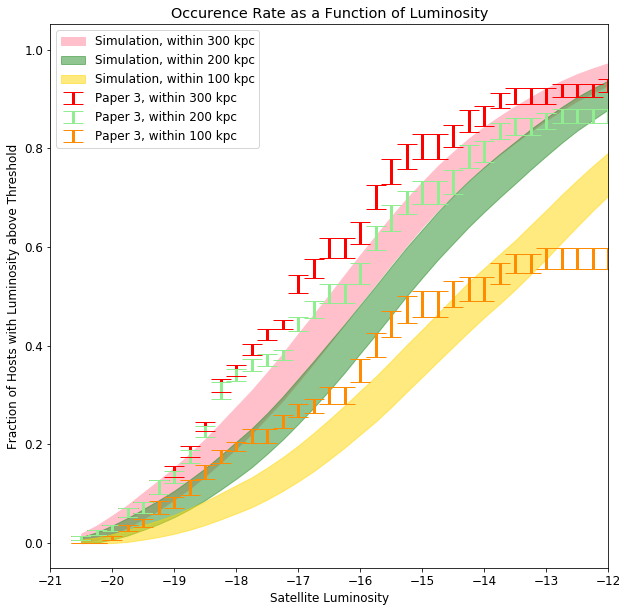

In [96]:
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['font.size'] = 12
plt.errorbar(lum_occs_300.keys(), lum_occs_300.values(), yerr = list(std_lum_300.values()), fmt = 'o', c = 'r',  marker = 'None',capsize = 10, markersize = 10, elinewidth = 3,label = "Paper 3, within 300 kpc")
plt.errorbar(lum_occs_200.keys(), lum_occs_200.values(), yerr = list(std_lum_200.values()), fmt = 'o', c = 'lightgreen', marker = 'None', capsize = 10,markersize = 10, elinewidth = 3, label = "Paper 3, within 200 kpc")
plt.errorbar(lum_occs_100.keys(), lum_occs_100.values(), yerr = list(std_lum_100.values()), fmt = 'o', c = 'darkorange', marker = 'None', capsize = 10,markersize = 10,elinewidth = 3, label = "Paper 3, within 100 kpc")

plt.fill_between(p3_lum_sims_occs_300_means.keys(), p3_bound_up_sat_rad_143_300_lum, p3_bound_down_sat_rad_143_300_lum, color = 'pink', label = "Simulation, within 300 kpc")
plt.fill_between(p3_lum_sims_occs_200_means.keys(), p3_bound_up_sat_rad_143_200_lum, p3_bound_down_sat_rad_143_200_lum, color = 'forestgreen', alpha = 0.5, label = "Simulation, within 200 kpc")
plt.fill_between(p3_lum_sims_occs_100_means.keys(), p3_bound_up_sat_rad_143_100_lum, p3_bound_down_sat_rad_143_100_lum, color = 'gold', alpha = 0.5,label = "Simulation, within 100 kpc")

plt.title("Occurence Rate as a Function of Luminosity")
#plt.gca().invert_xaxis()
plt.legend(loc = 'upper left')
plt.ylabel("Fraction of Hosts with Luminosity above Threshold")
plt.xlabel('Satellite Luminosity')
plt.xlim(right = -12)

In [97]:
p3_bound_up_sat_rad_143_100_mg_corr, p3_bound_down_sat_rad_143_100_mg_corr = determine_fill_bounds(p3_mg_sims_occs_100_stds_corr.values(),p3_mg_sims_occs_100_means_corr)
p3_bound_up_sat_rad_143_200_mg_corr, p3_bound_down_sat_rad_143_200_mg_corr = determine_fill_bounds(p3_mg_sims_occs_200_stds_corr.values(),p3_mg_sims_occs_200_means_corr)
p3_bound_up_sat_rad_143_300_mg_corr, p3_bound_down_sat_rad_143_300_mg_corr = determine_fill_bounds(p3_mg_sims_occs_300_stds_corr.values(),p3_mg_sims_occs_300_means_corr)

Text(0.5, 0, 'Magnitude Gap: Host - Satellite')

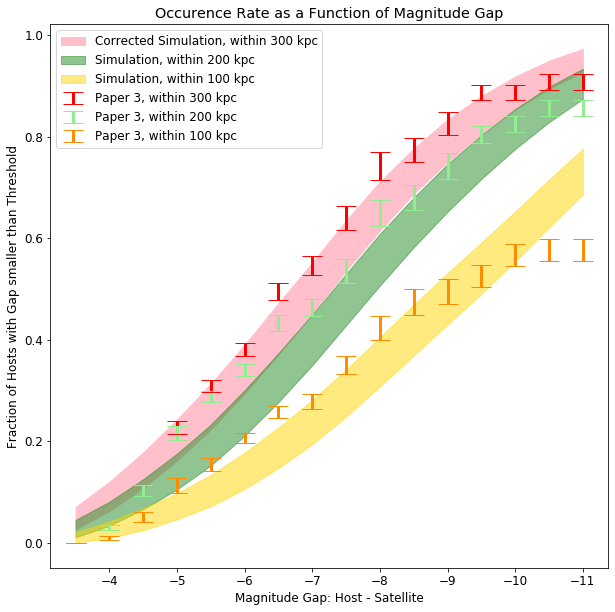

In [99]:
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['font.size'] = 12
plt.errorbar(mg_occs_300.keys(), mg_occs_300.values(), yerr = list(mg_std_300.values()), fmt = 'o', c = 'r',  marker = 'None',capsize = 10, markersize = 10, elinewidth = 3,label = "Paper 3, within 300 kpc")
plt.errorbar(mg_occs_200.keys(), mg_occs_200.values(), yerr = list(mg_std_200.values()), fmt = 'o', c = 'lightgreen', marker = 'None', capsize = 10,markersize = 10, elinewidth = 3, label = "Paper 3, within 200 kpc")
plt.errorbar(mg_occs_100.keys(), mg_occs_100.values(), yerr = list(mg_std_100.values()), fmt = 'o', c = 'darkorange', marker = 'None', capsize = 10,markersize = 10,elinewidth = 3, label = "Paper 3, within 100 kpc")

plt.fill_between(p3_mg_sims_occs_300_means_corr.keys(), p3_bound_up_sat_rad_143_300_mg_corr, p3_bound_down_sat_rad_143_300_mg_corr, color = 'pink', label = "Corrected Simulation, within 300 kpc")
plt.fill_between(p3_mg_sims_occs_200_means_corr.keys(), p3_bound_up_sat_rad_143_200_mg_corr, p3_bound_down_sat_rad_143_200_mg_corr, color = 'forestgreen', alpha = 0.5, label = "Simulation, within 200 kpc")
plt.fill_between(p3_mg_sims_occs_100_means_corr.keys(), p3_bound_up_sat_rad_143_100_mg_corr, p3_bound_down_sat_rad_143_100_mg_corr, color = 'gold', alpha = 0.5,label = "Simulation, within 100 kpc")

plt.title("Occurence Rate as a Function of Magnitude Gap")
plt.gca().invert_xaxis()
plt.legend(loc = 'upper left')
plt.ylabel("Fraction of Hosts with Gap smaller than Threshold")
plt.xlabel('Magnitude Gap: Host - Satellite')

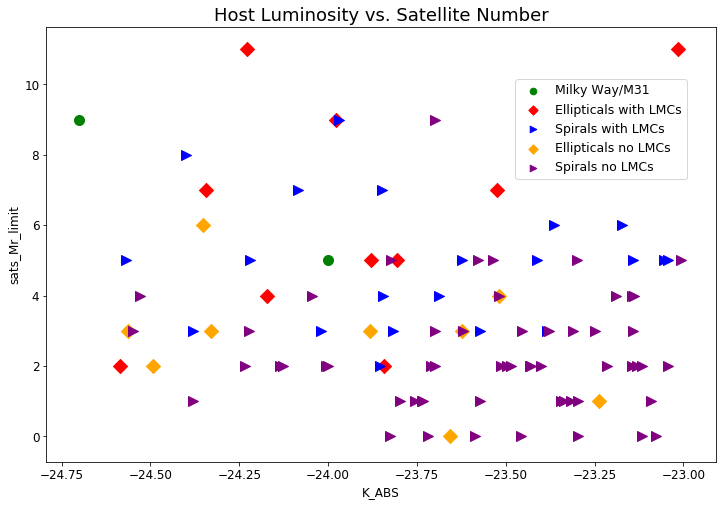

In [100]:
fig, ax = plt.subplots(figsize=(12, 8)) 
mw_m31.plot(kind='scatter',x='K_ABS',y='sat_num', s = 100, color='green', ax=ax, label = 'Milky Way/M31')
p3_LMC_ES0.plot(kind='scatter',x='K_ABS',y='sats_Mr_limit', s = 100, color='red', marker = 'D', ax = ax, label = 'Ellipticals with LMCs')
p3_LMC_SAB.plot(kind='scatter',x='K_ABS',y='sats_Mr_limit', s = 100, color='blue', marker = '>', ax = ax, label = 'Spirals with LMCs')
p3_no_LMC_ES0.plot(kind='scatter',x='K_ABS',y='sats_Mr_limit', s = 100, color='orange', marker = 'D', ax = ax, label = 'Ellipticals no LMCs')
p3_no_LMC_SAB.plot(kind='scatter',x='K_ABS',y='sats_Mr_limit', s = 100, color='purple', marker = '>', ax = ax, label = 'Spirals no LMCs')
plt.rcParams['font.size'] = 15
#plt.figure(figsize=(20, 25))
plt.legend(loc = [0.7, 0.65] ,fontsize = 'small', markerscale = 0.66)
plt.title('Host Luminosity vs. Satellite Number')
plt.show()

Text(0.5, 1.0, 'Mean Host Brightness vs. Mean Number of Satellites (LMC Removed, Luminosity Matched)')

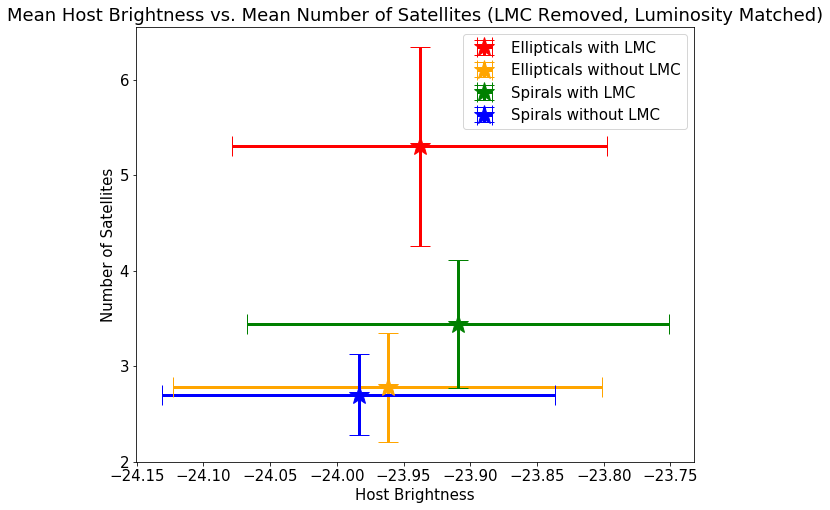

In [104]:
fig, ax = plt.subplots(figsize=(10, 8)) 
plt.errorbar(p3_LMC_ES0_sem_mean_kabs[1], p3_LMC_ES0_sem_mean_sats_corr[1], xerr = p3_LMC_ES0_sem_mean_kabs[0], yerr = p3_LMC_ES0_sem_mean_sats_corr[0], c = 'r', ecolor = 'r', fmt = 'o', marker = '*', elinewidth = 3, markersize = 20, capsize = 10, label = 'Ellipticals with LMC')
plt.errorbar(p3_no_LMC_ES0_sem_mean_kabs[1], p3_no_LMC_ES0_sem_mean_sats[1],  xerr = p3_no_LMC_ES0_sem_mean_kabs[0],  yerr = p3_no_LMC_ES0_sem_mean_sats[0], c = 'orange', ecolor = 'orange', fmt = 'o', marker = '*', elinewidth = 3, markersize = 20, capsize = 10, label = 'Ellipticals without LMC')
plt.errorbar(p3_LMC_SAB_select_sem_mean_kabs[1], p3_LMC_SAB_select_sem_mean_sats_corr[1],  xerr = p3_LMC_SAB_select_sem_mean_kabs[0], yerr = p3_LMC_SAB_select_sem_mean_sats_corr[0], c = 'green', ecolor = 'green', fmt = 'o', marker = '*', elinewidth = 3, markersize = 20, capsize = 10, label = 'Spirals with LMC')
plt.errorbar(p3_no_LMC_SAB_select_sem_mean_kabs[1], p3_no_LMC_SAB_select_sem_mean_sats[1],  xerr = p3_no_LMC_SAB_select_sem_mean_kabs[0], yerr = p3_no_LMC_SAB_select_sem_mean_sats[0], c = 'b', ecolor = 'b', fmt = 'o', marker = '*', elinewidth = 3, markersize = 20, capsize = 10, label = 'Spirals without LMC')

plt.legend(loc = 'upper right')
plt.xlabel('Host Brightness')
plt.ylabel('Number of Satellites')
plt.title('Mean Host Brightness vs. Mean Number of Satellites (LMC Removed, Luminosity Matched)')

Text(0.5, 0, 'Distance of Satellite')

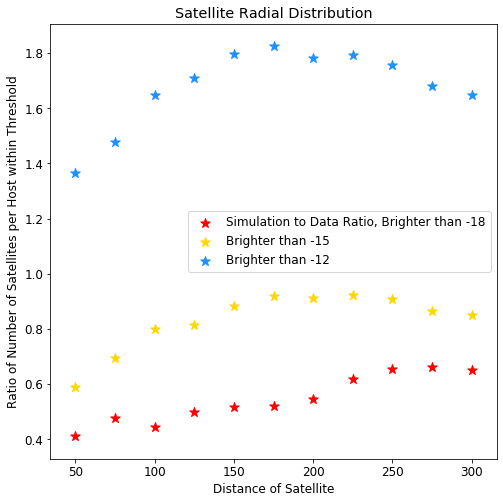

In [105]:
plt.rcParams["figure.figsize"] = (8,8)
plt.rcParams['font.size'] = 12
plt.scatter(ratio_host_count_18.keys(), ratio_host_count_18.values(),  c = 'red', marker = '*', s = 100, label = "Simulation to Data Ratio, Brighter than -18")
plt.scatter(ratio_host_count_15.keys(), ratio_host_count_15.values(),  c = 'gold', marker = '*', s = 100, label = "Brighter than -15")
plt.scatter(ratio_host_count_12.keys(), ratio_host_count_12.values(),  c = 'dodgerblue', marker = '*', s = 100, label = "Brighter than -12")

plt.title("Satellite Radial Distribution")
#plt.gca().invert_xaxis()
plt.legend(loc = 'center right')
plt.ylabel("Ratio of Number of Satellites per Host within Threshold")
plt.xlabel('Distance of Satellite')

In [106]:
host_count_15_sims_bound_up, host_count_15_sims_bound_down =  determine_fill_bounds(host_count_15_mean_of_stds_sims.values(), host_count_15_mean_of_means_sims)

Text(0.5, 0, 'Distance of Satellite')

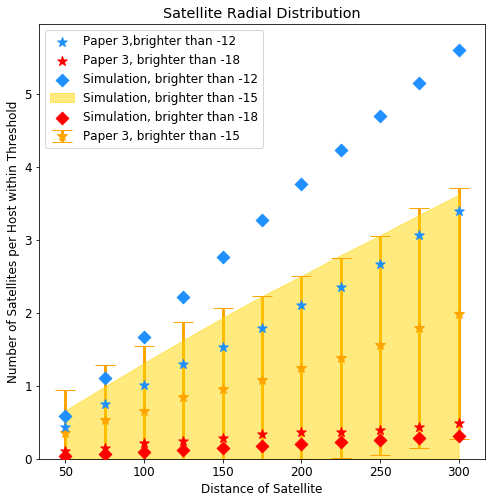

In [109]:
#this needs to be fixed
plt.rcParams["figure.figsize"] = (8,8)
plt.rcParams['font.size'] = 12
plt.scatter(host_rad_lum_12_means.keys(), host_rad_lum_12_means.values(),  c = 'dodgerblue', marker = '*', s = 100,zorder = 2,label = "Paper 3,brighter than -12")
plt.errorbar(host_rad_lum_15_means.keys(), host_rad_lum_15_means.values(), yerr = list(host_rad_lum_15_stds.values()), fmt = 'o', c = 'orange', marker = '*', capsize = 10,markersize = 10, elinewidth = 3, zorder = 1, label = "Paper 3, brighter than -15")
plt.scatter(host_rad_lum_18_means.keys(), host_rad_lum_18_means.values(),  c = 'r',  marker = '*', s = 100,zorder = 3, label = "Paper 3, brighter than -18")

plt.scatter(host_count_12_mean_of_means_sims.keys(), host_count_12_mean_of_means_sims.values(),  c = 'dodgerblue', marker = 'D', s = 80,zorder = 2,label = "Simulation, brighter than -12")
plt.fill_between(host_count_15_mean_of_means_sims.keys(), host_count_15_sims_bound_up, host_count_15_sims_bound_down, color = 'gold', alpha = 0.5, label = "Simulation, brighter than -15")
plt.scatter(host_count_18_mean_of_means_sims.keys(), host_count_18_mean_of_means_sims.values(),  c = 'r',  marker = 'D', s = 80,zorder = 3, label = "Simulation, brighter than -18")

#plt.errorbar(p2_hosts_lmcs_vary_lum_extend_occ.keys(), p2_hosts_lmcs_vary_lum_extend_occ.values(), yerr = p2_std_jk_lum_extend_8, c = 'dodgerblue', ecolor = 'dodgerblue', fmt = 'o', marker = 'None', elinewidth = 3, markersize = 20, capsize = 10,label = "Paper 2, within 300 kpc")
#plt.scatter(arr_keys, m*arr_keys + b, c = 'b')
#plt.plot(np.unique(arr_keys_lum_extend), np.poly1d(np.polyfit(arr_keys_lum_extend, arr_values_lum_extend, 1))(np.unique(arr_keys_lum_extend)), linewidth = 2, label = "Line of Best Fit")
#plt.plot(-18.3, .3093, color = 'green', marker = '*',markersize = 15, label = 'Past Cut at -18.3')
#plt.text(-14, 0.2, 'y = 0.0536x - 1.1733')
plt.title("Satellite Radial Distribution")
plt.ylim(bottom = 0)
plt.legend(loc = 'upper left')
plt.ylabel("Number of Satellites per Host within Threshold")
plt.xlabel('Distance of Satellite')

Text(0, 0.5, 'Mean Number of Satellites')

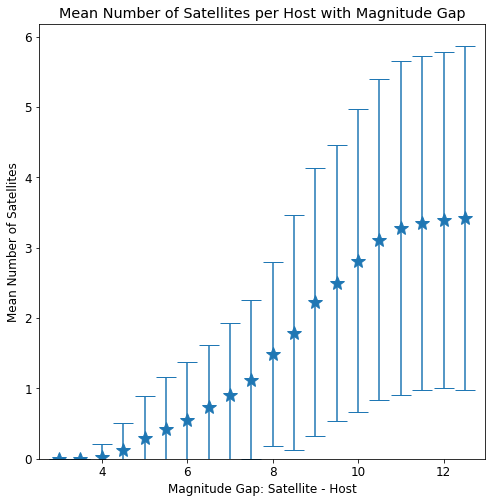

In [108]:
plt.errorbar(mg_count.keys(), mg_count_means, yerr= mg_count_stds, fmt = 'o', marker = '*', markersize = 15, capsize = 10, label = 'No Radial Cut')
plt.ylim(bottom=0)
plt.title('Mean Number of Satellites per Host with Magnitude Gap')
plt.xlabel('Magnitude Gap: Satellite - Host')
plt.ylabel('Mean Number of Satellites')